<a href="https://colab.research.google.com/github/Av01/Reinforcement-Learning/blob/master/frozenlake.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [290]:
!pip install gym
import gym
import numpy as np

In [291]:
env = gym.make('FrozenLake-v0')

/usr/local/lib/python3.6/dist-packages/gym/envs/registration.py:14: PkgResourcesDeprecationWarning: Parameters to load are deprecated.  Call .resolve and .require separately.
  result = entry_point.load(False)


In [0]:
def select(Q):
  maxq = -100000
  ind = []
  for i in range(len(Q)):
#     print(Q[i])
    if Q[i] == maxq:
      ind.append(i)
    elif Q[i] >= maxq:
      maxq = Q[i]
      ind = []
      ind.append(i)
  return np.random.choice(ind)

In [318]:
Q = np.zeros([env.observation_space.n,env.action_space.n])
# Q = np.random.rand(env.observation_space.n,env.action_space.n)
lr = 0.1
y = 0.99
epsilon = 1
episodes_n = 5000
rList = []
stepList = []
goal = 0
for i in range(episodes_n):
#while step != 10000:
    totR = 0
   # print(i)
    j = 0
    d = False
    s = env.reset()
    while j < 99:
        #env.render()
        j += 1
   #     print("a")
        if np.random.rand(1) < epsilon:
             a = env.action_space.sample()
             epsilon*=0.995
        else:
             a = select(Q[s,:])# + np.random.rand(1,env.action_space.n)*(1/1+i))
#        a = np.argmax(Q[s,:] + np.random.rand(1,env.action_space.n)*(1/1+i))
        s1,r,d,_ = env.step(a)      
        if d and r == 0:
          r = -1
#         elif not d and r == 0:
#           r = -0.01
        totR += r
        Q[s,a] += lr*(r + y*np.max(Q[s1,:]) - Q[s,a])
#         lr*=0.9999
        s = s1
        if d:
            Q[s,:] = r
            break
    if r == 1:
      goal+=1
      stepList.append(j)
    rList.append(totR)
#     if i%10000 == 0:
#       print(Q)
print(Q)
    

[[ 0.80732862  0.70063184  0.69442811  0.70779121]
 [-0.53416996 -0.7034046  -0.6253924   0.78094237]
 [ 0.22167139  0.07103836  0.18703188  0.72581142]
 [-0.18341622 -0.23528626 -0.59423931  0.69160941]
 [ 0.81795913 -0.04959392 -0.09617617  0.0177504 ]
 [-1.         -1.         -1.         -1.        ]
 [-0.97975008 -1.01429729 -0.66882205 -1.20146737]
 [-1.         -1.         -1.         -1.        ]
 [ 0.13406677 -0.66715522  0.5097004   0.84898258]
 [ 0.55864142  0.89264363 -0.1279934  -0.32304901]
 [ 0.56313085 -0.02687779 -0.25054546 -0.30853157]
 [-1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.        ]
 [-0.47267116  0.274674    1.3769536   0.32616137]
 [ 0.98296784  1.62357932  1.06533169  0.86229219]
 [ 1.          1.          1.          1.        ]]


In [319]:
print(goal,lr,epsilon)

3477 0.1 0.0009563414826622277


In [301]:
print("Avg. Reward:" + str(np.mean(rList[-50:])))

Avg. Reward:0.52


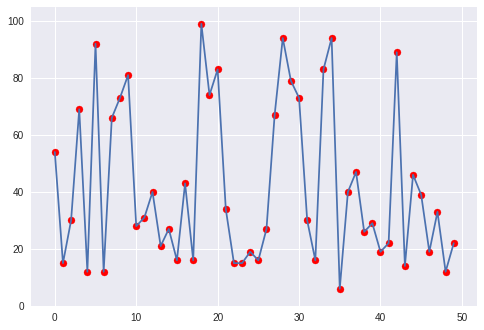

In [302]:
import matplotlib.pyplot as plt
y = stepList[-50:]
x = range(50)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.scatter(x,y,color='red')

In [303]:
np.mean(stepList[-50:])

42.14

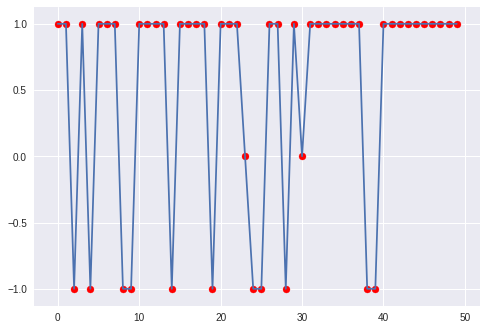

In [317]:
import matplotlib.pyplot as plt
y = rList[-50:]
x = range(50)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x,y)
ax.scatter(x,y,color='red')

In [0]:
print("The Q-Table:")
print(Q)

The Q-Table:
[[-0.06192471 -0.08686161 -0.06802041  0.00530303]
 [-1.32112017 -1.38811075 -1.62794958  0.00684319]
 [-0.16118879 -0.67621791 -0.8047841   0.00909495]
 [-0.918988   -1.67002728 -1.72000105  0.00958136]
 [-0.08354757 -0.56069434 -1.44715522 -1.6567679 ]
 [-1.         -1.         -1.         -1.        ]
 [-1.01494739 -1.8478422  -1.84548362 -1.82431427]
 [-1.         -1.         -1.         -1.        ]
 [-0.40490809 -0.99765058 -1.69857619 -0.18197561]
 [-0.39926681 -0.5971022  -0.66423194 -1.5469922 ]
 [-0.86520456 -1.16607029 -1.20330356 -1.18478899]
 [-1.         -1.         -1.         -1.        ]
 [-1.         -1.         -1.         -1.        ]
 [-0.62006486 -0.05129525  0.67579997 -1.02401455]
 [ 0.31529367  0.89964379  0.          0.10149944]
 [ 1.          1.          1.          1.        ]]


In [0]:
def check_algo(Q_table,n):
    rl = []
    for i in range(n):
        s = env.reset()
        d = False
        Tr = 0
#         print("Episode: ",i)
        while not d:
            env.render()
            a = select(Q_table[s,:])
            #print(a)
            s,r,d,_ = env.step(a)
            #print(r)
            Tr+=r
        env.render()
        rl.append(Tr)
        print("Episode ",i+1," Ended, Reward: ",Tr)
    return np.mean(rl)

In [324]:
check_algo(Q,5)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Right)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
Episode  0  Ended, Reward:  1.0

SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (

1.0